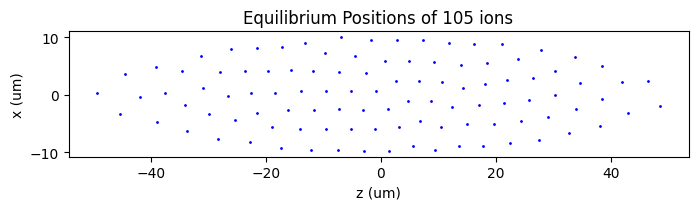

In [22]:
# 计算平衡位置
import os
import numpy as np
import matplotlib.pyplot as plt
N = 105
dt = 0.5*9.022389064166401e-03  # us
start = 0.0
dir_name = f"../data_cache/traj/N={N:d},t0={start:.3f},g=0.1/r/"
Nt = len(list(os.listdir(dir_name)))
t_ls = np.arange(1, Nt+1)*dt + start
ts = 50
tf = 100
mask = (t_ls >= ts) & (t_ls <= tf)
t_ls = t_ls[mask]
Nt = t_ls.size
traj_r = np.zeros((Nt, N, 3))
for t in range(Nt):
        rt = np.load(dir_name+"%.3fus.npy"%t_ls[t])
        traj_r[t] = rt
r_eq = np.mean(traj_r, axis=0) 
np.save("../data_cache/req,N=%d.npy"%N, r_eq)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(r_eq[:, 2], r_eq[:, 0], s=1, c='blue')
ax.set_xlabel('z (um)')
ax.set_ylabel('x (um)')
ax.set_title('Equilibrium Positions of %d ions'%N)
ax.set_aspect('equal', 'box')
plt.show()

/tmp/ipykernel_743651/133133633.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


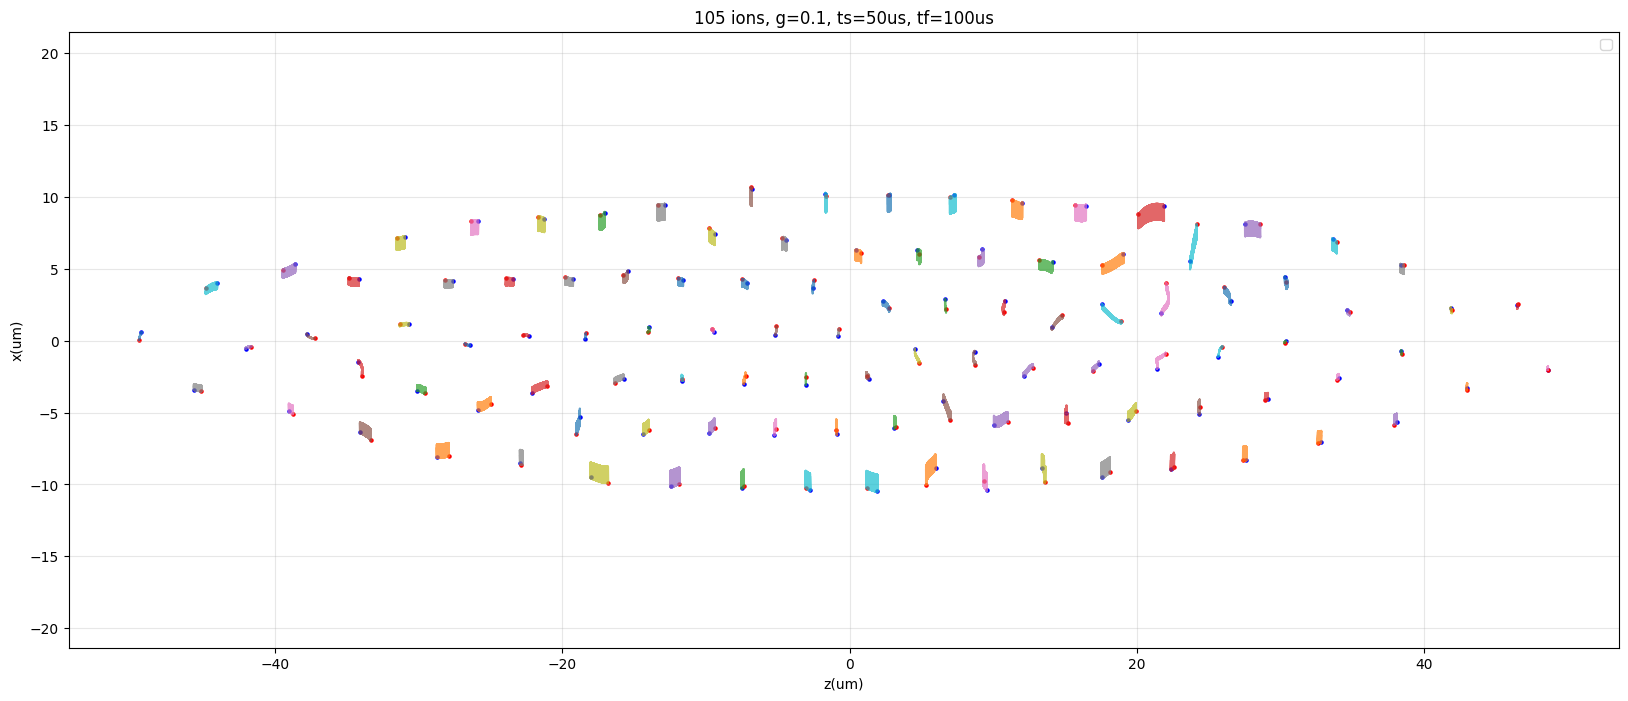

In [23]:
# 静态画所有轨迹
traj = traj_r
fig, ax = plt.subplots(figsize=(20, 8))
for i in range(N):
    ax.plot(traj[:, i, 2], traj[:, i, 0], 
             lw=1.5, alpha=0.7)
ax.scatter(traj[0, :, 2], traj[0, :, 0], s=5, c='b')
ax.scatter(traj[-1, :, 2], traj[-1, :, 0], s=5, c='r')
ax.set_aspect('equal')    

plt.title(f'{N:d} ions, g=0.1, ts={ts:.6g}us, tf={tf:.6g}us')
plt.xlabel('z(um)')
plt.ylabel('x(um)')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.legend()
plt.show()

In [24]:
# Hc
# CPU Parallel in Hc
from scipy.constants import e, pi, epsilon_0
from concurrent.futures import ProcessPoolExecutor
from numpy.linalg import norm, eigvalsh
import time
import numpy as np

def hessian_i(i, R):
    start_i = time.time()
    res = np.zeros((3, 3*N))
    for j in range(N):
        if i == j:
            continue
        else:
            rij = R[i] - R[j]
            r = norm(rij) + 1e-20
            outer = np.outer(rij, rij)
            block = np.eye(3)/(r**3) - 3*outer/(r**5)
            # 对称填充 Hessian
            res[:, 3*j:3*j+3] = block
    res[:, 3*i:3*i+3] = -sum(res[:, 3*j:3*j+3] for j in range(N))
    end_i = time.time()
    print("Finished %d, taking %.3f s"%(i, end_i-start_i))
    return i, res

def hessian_parallel(R):
    R = R.reshape(N, 3)
    H = np.zeros((3*N, 3*N))
    with ProcessPoolExecutor(max_workers=12) as executor:
        futures = [executor.submit(hessian_i, i, R) for i in range(N)]
        for future in futures:
            i, res = future.result()
            H[3*i:3*i+3, :] = res
    return H*e**2/(4*pi*epsilon_0)

if __name__ == "__main__":
    r = r_eq
    N = r.shape[0]
    start = time.time()
    Hc = hessian_parallel(r*1e-6)  # SI
    # np.save("../data_cache/%d/hessian_coulomb.npy"%N, Hc)
    end = time.time()
    print(end-start)

Finished 5, taking 0.001 sFinished 0, taking 0.001 sFinished 8, taking 0.001 sFinished 4, taking 0.001 sFinished 7, taking 0.001 sFinished 11, taking 0.001 sFinished 1, taking 0.001 sFinished 9, taking 0.001 sFinished 2, taking 0.002 s



Finished 6, taking 0.003 s
Finished 12, taking 0.001 sFinished 21, taking 0.001 sFinished 27, taking 0.001 s
Finished 3, taking 0.004 s
Finished 10, taking 0.002 s



Finished 14, taking 0.001 sFinished 13, taking 0.001 s
Finished 15, taking 0.001 sFinished 16, taking 0.001 sFinished 19, taking 0.001 s
Finished 17, taking 0.001 s
Finished 20, taking 0.001 s




Finished 18, taking 0.002 sFinished 23, taking 0.001 sFinished 24, taking 0.001 sFinished 25, taking 0.001 s

Finished 22, taking 0.002 sFinished 26, taking 0.001 s
Finished 28, taking 0.001 s


Finished 29, taking 0.002 s


Finished 32, taking 0.001 s
Finished 30, taking 0.002 sFinished 33, taking 0.001 s
Finished 35, taking 0.001 sFinished 34, taking 0.001 sFinished 31, taking 0.003 sFinished




Finished 79, taking 0.001 s

Finished 80, taking 0.001 s
Finished 78, taking 0.002 sFinished 81, taking 0.001 s
Finished 83, taking 0.001 sFinished 82, taking 0.001 s


Finished 84, taking 0.001 s
Finished 86, taking 0.001 sFinished 85, taking 0.002 s
Finished 88, taking 0.001 s

Finished 89, taking 0.001 sFinished 87, taking 0.002 s
Finished 90, taking 0.001 s

Finished 91, taking 0.001 s

Finished 92, taking 0.001 sFinished 93, taking 0.001 s

Finished 96, taking 0.001 s
Finished 97, taking 0.001 sFinished 94, taking 0.002 sFinished 95, taking 0.002 sFinished 98, taking 0.001 sFinished 100, taking 0.001 s
Finished 99, taking 0.001 s




Finished 101, taking 0.001 s
Finished 102, taking 0.001 sFinished 103, taking 0.001 s


Finished 104, taking 0.002 s


In [25]:
print(np.max(Hc), np.min(Hc), np.mean(np.abs(Hc)))

2.0615104565094413e-11 -3.3020041000110775e-11 1.5677748806314458e-13


In [5]:
# 计算电势的格点分布
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath('')))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e, pi, epsilon_0
from scipy.signal import savgol_filter
import csv
import json
import math

# 从 monolithic.py 中复制的参数和函数
filename = "../../data/monolithic20241118.csv"
basis_filename = "./electrode_basis_7.json"
flag_smoothing = True

# 物理参数
Vrf = 550/2  # RF电压振幅
freq_RF = 35.28  # RF射频频率@MHz
Omega = freq_RF*2*pi*10**6  # RF射频角频率@SI
m = 2.239367e-25  # Ba135 离子的质量 @SI
ec = e  # 元电荷@SI
epsl = 8.854*10**(-12)  # 真空介电常数@SI

# 归一化参数
dt = 2/Omega  # 单位时间dt
dl = ((ec**2)/(4*pi*m*epsl*(Omega)**2))**(1/3)  # 单位长度dl
dV = m/ec*(dl/dt)**2  # 单位电压dV

print('dt =', dt, 'dl =', dl, 'dV =', dV)

# 电压设定
V_static = {"RF":-8, "U1":0, "U2":0, "U3":0, "U4":-1, "U5":0, "U6":0, "U7":0}
V_dynamic = {"RF": [Vrf, lambda t: np.cos(2*t)]}  # 动态电压设置

# 工具函数
def smoothing(data):
    return savgol_filter(data, 11, 3)

def loadConfig(fileName):
    try:
        with open(fileName, 'r', encoding='utf-8') as jf:
            config = json.load(jf)
        return config
    except Exception as er:
        print(f"无法加载配置文件 {fileName}: {er}")
        return {}

def interpret_voltage(value):
    if type(value) == list:
        return value[0]
    return value

# Data_Loader 类
class Data_Loader:
    def __init__(self, filename=filename):
        self.filename = filename
        self.data = []
        self.keymaps = {}
        self.keynames = []
        self.basis = {}
        self.unit_l = 1e-3
        self.basisGroup_map = {}
        self.units = {"m": 1e0, "cm": 1e-2, "mm": 1e-3, "um": 1e-6}
        self.smoothing = smoothing
        self.grids_dc = None
        self.grids_rf = None
        
    def getcol(self, key):
        """把电势场名key转换为表格的列序号"""
        if key in self.keymaps:
            return self.keymaps[key]
        else:
            cols = [v for k, v in self.keymaps.items() if (key == k.split(".")[0])]
            return cols[0] if len(cols) > 0 else None
    
    def loadData(self, name=None):
        """读取加载电势场格点文件数据"""
        try:
            self.load_Settings_CustomBasis()
            print("加载自定义Basis设置")
        except Exception as er:
            print(er)
        
        if name is None:
            name = self.filename
        
        with open(name, encoding='utf-8', mode='r') as file_read:
            csvread = csv.reader(file_read)
            for i, row in enumerate(csvread):
                if i > 20:
                    break
                if row[0] == r'% Length unit':
                    self.unit_l = self.units[row[1]]
                    print("self.unit_l =", self.unit_l)
                if row[0] == r'% x':
                    self.keymaps = {row[v].replace(r"% ", ""): v for v in range(len(row))}
                    self.keynames = [name for name in self.keymaps if name not in ["x", "y", "z"]]
                    break
        
        dat = pd.read_csv(name, comment='%', header=None)
        data = dat.to_numpy()
        data[:, 3:] *= 1/dV  # csv文件内的电势单位：V
        data[:, 0:3] *= self.unit_l/dl  # csv文件内坐标的长度单位：mm
        
        data = data[np.lexsort([data[:, 2], data[:, 1], data[:, 0]])]  # 统一排序
        self.coordinate = [self.x, self.y, self.z] = [x, y, z] = [np.unique(data[:, i]) for i in range(3)]
        self.coordinate_um = [temp/(1e-6/dl) for temp in self.coordinate]
        self.data = data
    
    def load_basis(self, key):
        """加载电势场名key的格点数据"""
        coln = self.getcol(key)
        
        if coln is None:
            # 从 basisGroup_map 中查找
            if key in self.basisGroup_map:
                basis_key = self.basisGroup_map[key]
                outputs = self.load_basis(basis_key)
            else:
                raise ValueError(f"无法找到电势场: {key}")
        else:
            outputs = self.data[:, coln].reshape(len(self.x), len(self.y), len(self.z))
        
        if flag_smoothing and self.smoothing is not None:
            outputs = self.smoothing(outputs)
        return outputs
    
    def load_Settings_CustomBasis(self):
        """加载自定义Basis设置"""
        self.basisGroup_map = loadConfig(basis_filename)

# 赝势计算函数
def pseudo_potential(data_loader):
    """计算RF场的赝势"""
    V0 = data_loader.load_basis("RF") * interpret_voltage(Vrf) * ec * dV  # 国际单位制
    [x, y, z] = data_loader.coordinate_um  # 换算成国际单位制
    Fx, Fy, Fz = np.gradient(-V0, x, y, z, edge_order=2)
    F0 = np.sqrt(Fx**2 + Fy**2 + Fz**2) * 1e6  # 因为距离单位为um，所以梯度要乘1e6
    V_pseudo_rf = F0**2 / (4 * m * Omega**2 * ec)
    return V_pseudo_rf

# 加载数据
print("正在加载数据...")
data_loader = Data_Loader(filename)
data_loader.loadData()

# 计算静态电势
print("正在计算静态电势...")
# 单位说明：
# - data_loader.load_basis(key) 返回的是归一化单位（在loadData中已通过 data[:, 3:] *= 1/dV 转换）
# - V_static中的值（如-8）是实际电压值（V），但在计算时：
#   potential_static = sum(load_basis(key) * value)
#   这里load_basis(key)是"单位电压下的归一化电势场"，乘以value后得到"归一化电势场"
#   所以potential_static的单位是归一化单位（无量纲）
potential_static = 0
for key, value in V_static.items():
    potential_static = potential_static + data_loader.load_basis(key) * interpret_voltage(value)

# 计算动态电势（赝势）
print("正在计算动态电势（赝势）...")
# 单位说明：
# - pseudo_potential()函数内部：
#   1. V0 = load_basis("RF") * Vrf * ec * dV
#      load_basis("RF")是归一化单位，乘以Vrf(V)、ec(C)、dV(V)后，V0的单位是V（SI单位）
#   2. V_pseudo_rf = F0^2/(4*m*Omega^2*ec)，返回的是SI单位的电势（V）
# - 所以V_pseudo的单位是SI单位（V），需要除以dV转换为归一化单位
V_pseudo = pseudo_potential(data_loader)

# 转换为国际单位制（用于可视化）
# 注意：这里转换为SI单位只是为了显示，实际计算时使用归一化单位
Vs = potential_static * dV  # 静态电势 (V) - 从归一化单位转换为SI单位
Vp = V_pseudo  # 赝势 (V) - 已经是SI单位
V_total = Vs + Vp  # 总电势 (V) - 用于可视化

print(f"静态电势形状: {Vs.shape}")
print(f"赝势形状: {Vp.shape}")
print(f"总电势形状: {V_total.shape}")
print(f"静态电势范围: [{np.min(Vs):.3e}, {np.max(Vs):.3e}] V")
print(f"赝势范围: [{np.min(Vp):.3e}, {np.max(Vp):.3e}] V")
print(f"总电势范围: [{np.min(V_total):.3e}, {np.max(V_total):.3e}] V")

# 保存坐标和电势
[x, y, z] = data_loader.coordinate_um
print(f"\n格点坐标范围:")
print(f"x: [{np.min(x):.3f}, {np.max(x):.3f}] um")
print(f"y: [{np.min(y):.3f}, {np.max(y):.3f}] um")
print(f"z: [{np.min(z):.3f}, {np.max(z):.3f}] um")

dt = 9.022389064166401e-09 dl = 2.757463340646677e-07 dV = 0.0013055432790611363
正在加载数据...
加载自定义Basis设置
self.unit_l = 0.001
正在计算静态电势...
正在计算动态电势（赝势）...
静态电势形状: (101, 51, 201)
赝势形状: (101, 51, 201)
总电势形状: (101, 51, 201)
静态电势范围: [-7.004e+00, -6.119e+00] V
赝势范围: [1.136e-07, 1.102e+00] V
总电势范围: [-6.355e+00, -5.592e+00] V

格点坐标范围:
x: [-100.000, 100.000] um
y: [-50.000, 50.000] um
z: [-600.000, 600.000] um


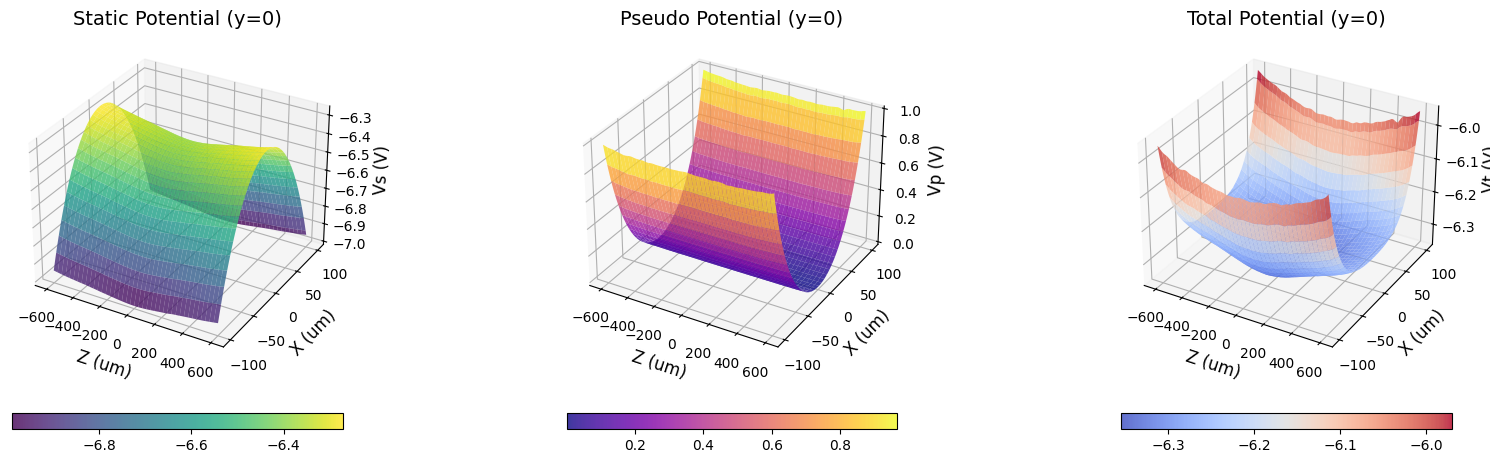

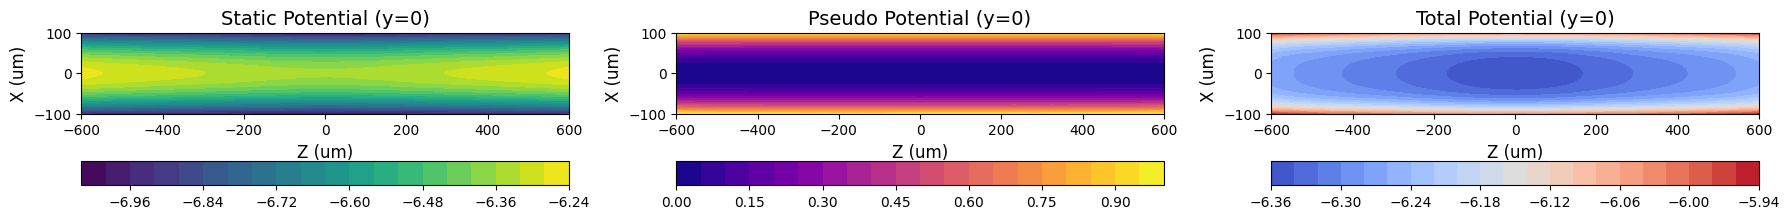

In [6]:
# 可视化电势分布
# 选择 y=0 的截面进行可视化
shape = Vs.shape
y_mid = int(np.ceil(shape[1]/2))

# 提取 y=0 截面的电势
Vs_y0 = Vs[:, y_mid, :]  # 静态电势
Vp_y0 = Vp[:, y_mid, :]  # 赝势
Vt_y0 = V_total[:, y_mid, :]  # 总电势

# 创建网格
X, Z = np.meshgrid(z, x)

# 绘制3D表面图
fig = plt.figure(figsize=(18, 5))

# 静态电势
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(X, Z, Vs_y0, cmap='viridis', alpha=0.8)
ax1.set_xlabel('Z (um)', fontsize=12)
ax1.set_ylabel('X (um)', fontsize=12)
ax1.set_zlabel('Vs (V)', fontsize=12)
ax1.set_title('Static Potential (y=0)', fontsize=14)
plt.colorbar(surf1, ax=ax1, shrink=0.5, orientation='horizontal', pad=0.1)

# 赝势
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(X, Z, Vp_y0, cmap='plasma', alpha=0.8)
ax2.set_xlabel('Z (um)', fontsize=12)
ax2.set_ylabel('X (um)', fontsize=12)
ax2.set_zlabel('Vp (V)', fontsize=12)
ax2.set_title('Pseudo Potential (y=0)', fontsize=14)
plt.colorbar(surf2, ax=ax2, shrink=0.5, orientation='horizontal', pad=0.1)

# 总电势
ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(X, Z, Vt_y0, cmap='coolwarm', alpha=0.8)
ax3.set_xlabel('Z (um)', fontsize=12)
ax3.set_ylabel('X (um)', fontsize=12)
ax3.set_zlabel('Vt (V)', fontsize=12)
ax3.set_title('Total Potential (y=0)', fontsize=14)
plt.colorbar(surf3, ax=ax3, shrink=0.5, orientation='horizontal', pad=0.1)

plt.tight_layout()
plt.show()

# 绘制2D等高线图
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 静态电势等高线
cont1 = axes[0].contourf(X, Z, Vs_y0, levels=20, cmap='viridis')
axes[0].set_xlabel('Z (um)', fontsize=12)
axes[0].set_ylabel('X (um)', fontsize=12)
axes[0].set_title('Static Potential (y=0)', fontsize=14)
axes[0].set_aspect('equal')
plt.colorbar(cont1, ax=axes[0], orientation='horizontal', pad=0.1)

# 赝势等高线
cont2 = axes[1].contourf(X, Z, Vp_y0, levels=20, cmap='plasma')
axes[1].set_xlabel('Z (um)', fontsize=12)
axes[1].set_ylabel('X (um)', fontsize=12)
axes[1].set_title('Pseudo Potential (y=0)', fontsize=14)
axes[1].set_aspect('equal')
plt.colorbar(cont2, ax=axes[1], orientation='horizontal', pad=0.1)

# 总电势等高线
cont3 = axes[2].contourf(X, Z, Vt_y0, levels=20, cmap='coolwarm')
axes[2].set_xlabel('Z (um)', fontsize=12)
axes[2].set_ylabel('X (um)', fontsize=12)
axes[2].set_title('Total Potential (y=0)', fontsize=14)
axes[2].set_aspect('equal')
plt.colorbar(cont3, ax=axes[2], orientation='horizontal', pad=0.1)

plt.tight_layout()
plt.show()

In [4]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())  # 应为 True
print(torch.version.cuda)
print(torch.cuda.get_device_name(0))

2.9.1+cu128
True
12.8
NVIDIA GeForce RTX 5060 Laptop GPU


使用设备: cuda
网格边界: min=[np.float64(-362.65214672363476), np.float64(-181.32607336131738), np.float64(-2175.9128803468084)], max=[np.float64(362.65214672363476), np.float64(181.32607336131738), np.float64(2175.9128803468084)]
总势能最小值: -6.355421e+00 V (SI单位)
已将总势能的最小值设为0点，偏移量: -6.355421e+00 V = -3.966742e+19 eV
总势能范围（调整后）: [0.000000e+00, 7.630671e-01] V
格点尺寸: x=101, y=51, z=201
已创建PyTorch tensors
已定义PyTorch能量函数（支持自动微分）
使用随机初始位置，范围: 150

初始总能量: 8.658155e+00 eV

开始PyTorch能量最小化优化...
优化变量数: 900 (3 × 300)
使用L-BFGS优化器（带边界约束）
迭代 0: 能量 = 8.658155e+00 eV, 变化 = 0.000000e+00 eV
迭代 10: 能量 = 2.501730e+00 eV, 变化 = 3.051758e-05 eV
收敛于迭代 15

优化完成！耗时: 29.23 秒
最终总能量: 2.501706e+00 eV
能量降低: 6.156449e+00 eV

平衡位置统计:
x范围: [-20.903, 20.642] um
y范围: [-0.043, 0.250] um
z范围: [-125.979, 126.984] um

平衡位置已保存到: ../data_cache/req,N=300.npy

y 方向坐标的标准差: 0.064530 um


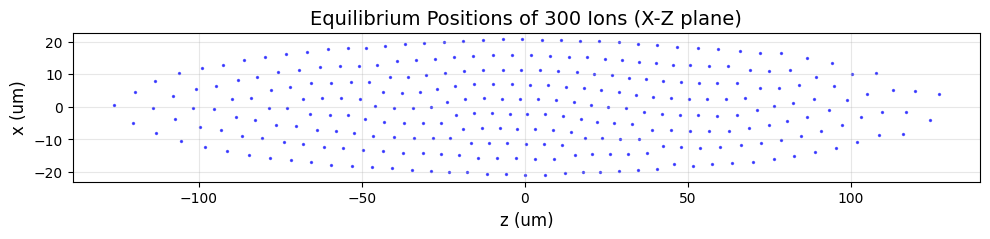


计算完成！


In [ ]:
# 通过能量最小化计算300个Ba135单电子离子的平衡位置（使用PyTorch加速）
import torch
import torch.nn.functional as F
from scipy.constants import e, pi, epsilon_0
from numpy.linalg import norm
import time

# 检查是否有GPU可用
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"使用设备: {device}")

# 设置离子数量
N_ions = 300

# 物理参数
charge_val = ec  # 每个离子带1个元电荷

# 计算边界
bound_min = [np.min(data_loader.coordinate[i]) + 1e-9 for i in range(3)]
bound_max = [np.max(data_loader.coordinate[i]) - 1e-9 for i in range(3)]
print(f"网格边界: min={bound_min}, max={bound_max}")

# 创建总电势场的插值器（静态电势 + 赝势）
# 总电势 = 静态电势 + 赝势（归一化单位）
#
# 单位转换说明：
# 1. potential_static: 已经是归一化单位（无量纲）
#    - data_loader.load_basis(key) 在loadData中已通过 data[:, 3:] *= 1/dV 转换为归一化单位
#    - 所以 potential_static = sum(load_basis(key) * value) 的单位是归一化单位
#
# 2. V_pseudo: 是SI单位（V）
#    - pseudo_potential()函数返回的是SI单位的电势（V）
#    - 需要除以dV转换为归一化单位：V_pseudo / dV
#
# 因此：V_total_normalized = potential_static + V_pseudo / dV
#       (归一化单位) = (归一化单位) + (V) / (V) = 归一化单位
V_total_normalized = potential_static + V_pseudo / dV  # 归一化单位

# 找到总势能的最小值，并将其设为0点（减去最小值）
V_total_min = np.min(V_total_normalized)
V_total_normalized = V_total_normalized - V_total_min  # 将最小值设为0
print(f"总势能最小值: {V_total_min * dV:.6e} V (SI单位)")
print(f"已将总势能的最小值设为0点，偏移量: {V_total_min * dV:.6e} V = {V_total_min * dV / e:.6e} eV")
print(f"总势能范围（调整后）: [{np.min(V_total_normalized) * dV:.6e}, {np.max(V_total_normalized) * dV:.6e}] V")

[x, y, z] = data_loader.coordinate
print(f"格点尺寸: x={len(x)}, y={len(y)}, z={len(z)}")

# 将格点坐标和电势转换为PyTorch tensor
x_tensor = torch.tensor(x, dtype=torch.float32, device=device)
y_tensor = torch.tensor(y, dtype=torch.float32, device=device)
z_tensor = torch.tensor(z, dtype=torch.float32, device=device)
V_total_tensor = torch.tensor(V_total_normalized, dtype=torch.float32, device=device)

# 归一化参数转换为tensor
dl_tensor = torch.tensor(dl, dtype=torch.float32, device=device)
dt_tensor = torch.tensor(dt, dtype=torch.float32, device=device)
m_tensor = torch.tensor(m, dtype=torch.float32, device=device)
ec_tensor = torch.tensor(ec, dtype=torch.float32, device=device)
epsl_tensor = torch.tensor(epsilon_0, dtype=torch.float32, device=device)

# 边界转换为tensor
bound_min_tensor = torch.tensor(bound_min, dtype=torch.float32, device=device)
bound_max_tensor = torch.tensor(bound_max, dtype=torch.float32, device=device)

# 库伦常数
k_coulomb = ec_tensor**2 / (4 * pi * epsl_tensor)

print("已创建PyTorch tensors")

# 定义三次样条插值基函数（Catmull-Rom 样条，二阶可微）
def cubic_basis(t):
    """
    Catmull-Rom 样条基函数
    t: 插值参数 [0, 1]
    返回: [B0(t), B1(t), B2(t), B3(t)] - 四个基函数的值
    """
    t2 = t * t
    t3 = t2 * t
    # Catmull-Rom 样条基函数（确保 C² 连续性）
    B0 = (-t3 + 2*t2 - t) / 2.0
    B1 = (3*t3 - 5*t2 + 2) / 2.0
    B2 = (-3*t3 + 4*t2 + t) / 2.0
    B3 = (t3 - t2) / 2.0
    return torch.stack([B0, B1, B2, B3], dim=-1)  # (N, 4)

# 定义三三次样条插值函数（支持自动微分，二阶可微）
def tricubic_spline_interpolation(r_tensor, V_tensor, x_grid, y_grid, z_grid, 
                                   bound_min, bound_max, len_x, len_y, len_z):
    """
    三三次样条插值（使用 Catmull-Rom 样条）
    参数:
        r_tensor: 位置tensor (shape: (N, 3))
        V_tensor: 电势场tensor (shape: (nx, ny, nz))
        x_grid, y_grid, z_grid: 网格坐标tensor
        bound_min, bound_max: 边界tensor
        len_x, len_y, len_z: 网格尺寸
    返回: 插值后的电势值 (shape: (N,))
    """
    # 检查边界
    in_bounds = ((r_tensor[:, 0] >= bound_min[0]) & (r_tensor[:, 0] <= bound_max[0]) &
                 (r_tensor[:, 1] >= bound_min[1]) & (r_tensor[:, 1] <= bound_max[1]) &
                 (r_tensor[:, 2] >= bound_min[2]) & (r_tensor[:, 2] <= bound_max[2]))
    
    # 找到每个离子在格点中的位置（归一化索引）
    idx_x = (r_tensor[:, 0] - bound_min[0]) / (bound_max[0] - bound_min[0]) * (len_x - 1)
    idx_y = (r_tensor[:, 1] - bound_min[1]) / (bound_max[1] - bound_min[1]) * (len_y - 1)
    idx_z = (r_tensor[:, 2] - bound_min[2]) / (bound_max[2] - bound_min[2]) * (len_z - 1)
    
    # 计算整数索引和插值参数
    # 对于三三次样条，我们需要每个维度的4个控制点
    x_idx = idx_x.long().clamp(0, len_x - 1)
    y_idx = idx_y.long().clamp(0, len_y - 1)
    z_idx = idx_z.long().clamp(0, len_z - 1)
    
    # 处理边界情况：确保有足够的控制点
    x_idx = torch.clamp(x_idx, 1, len_x - 2)  # 需要前后各一个点
    y_idx = torch.clamp(y_idx, 1, len_y - 2)
    z_idx = torch.clamp(z_idx, 1, len_z - 2)
    
    # 获取4个控制点的索引
    x0 = x_idx - 1
    x1 = x_idx
    x2 = x_idx + 1
    x3 = torch.clamp(x_idx + 2, 0, len_x - 1)
    
    y0 = y_idx - 1
    y1 = y_idx
    y2 = y_idx + 1
    y3 = torch.clamp(y_idx + 2, 0, len_y - 1)
    
    z0 = z_idx - 1
    z1 = z_idx
    z2 = z_idx + 1
    z3 = torch.clamp(z_idx + 2, 0, len_z - 1)
    
    # 计算插值参数（相对于中心点 x1, y1, z1）
    tx = idx_x - x_idx.float()
    ty = idx_y - y_idx.float()
    tz = idx_z - z_idx.float()
    
    # 计算三次样条基函数
    Bx = cubic_basis(tx)  # (N, 4)
    By = cubic_basis(ty)  # (N, 4)
    Bz = cubic_basis(tz)  # (N, 4)
    
    # 三三次样条插值：对64个控制点进行加权求和
    V_interp = torch.zeros(r_tensor.shape[0], device=r_tensor.device, dtype=r_tensor.dtype)
    
    # 遍历所有64个控制点
    for i in range(4):
        for j in range(4):
            for k in range(4):
                # 获取控制点索引
                xi = torch.where(i == 0, x0, torch.where(i == 1, x1, torch.where(i == 2, x2, x3)))
                yj = torch.where(j == 0, y0, torch.where(j == 1, y1, torch.where(j == 2, y2, y3)))
                zk = torch.where(k == 0, z0, torch.where(k == 1, z1, torch.where(k == 2, z2, z3)))
                
                # 获取控制点的值
                # 使用高级索引，需要处理广播
                xi_flat = xi.flatten()
                yj_flat = yj.flatten()
                zk_flat = zk.flatten()
                batch_idx = torch.arange(len(xi), device=xi.device)
                
                V_ijk = V_tensor[xi_flat, yj_flat, zk_flat]
                
                # 加权求和
                weight = Bx[:, i] * By[:, j] * Bz[:, k]
                V_interp = V_interp + V_ijk * weight
    
    # 超出边界的惩罚
    penalty = torch.where(in_bounds, torch.tensor(0.0, device=r_tensor.device), 
                         torch.tensor(1e10, device=r_tensor.device))
    V_interp = V_interp + penalty
    
    return V_interp

# 优化版本：使用更高效的向量化实现
def tricubic_spline_interpolation_vec(r_tensor, V_tensor, x_grid, y_grid, z_grid,
                                      bound_min, bound_max, len_x, len_y, len_z):
    """
    三三次样条插值（向量化版本，更高效）
    使用 Catmull-Rom 样条，确保函数二阶可微
    """
    N = r_tensor.shape[0]
    
    # 检查边界
    in_bounds = ((r_tensor[:, 0] >= bound_min[0]) & (r_tensor[:, 0] <= bound_max[0]) &
                 (r_tensor[:, 1] >= bound_min[1]) & (r_tensor[:, 1] <= bound_max[1]) &
                 (r_tensor[:, 2] >= bound_min[2]) & (r_tensor[:, 2] <= bound_max[2]))
    
    # 找到每个离子在格点中的位置（归一化索引）
    # 添加小的epsilon避免除零，并确保分母不为零
    range_x = bound_max[0] - bound_min[0]
    range_y = bound_max[1] - bound_min[1]
    range_z = bound_max[2] - bound_min[2]
    
    # 避免除零和确保范围为正
    epsilon = 1e-10
    if range_x < epsilon:
        range_x = epsilon
    if range_y < epsilon:
        range_y = epsilon
    if range_z < epsilon:
        range_z = epsilon
    
    idx_x = (r_tensor[:, 0] - bound_min[0]) / range_x * (len_x - 1)
    idx_y = (r_tensor[:, 1] - bound_min[1]) / range_y * (len_y - 1)
    idx_z = (r_tensor[:, 2] - bound_min[2]) / range_z * (len_z - 1)
    
    # 限制索引范围，确保在有效范围内
    # 为了Catmull-Rom样条，我们需要确保能够访问[i-1, i, i+1, i+2]四个控制点
    # 所以插值点i应该在[1, len-2]范围内
    idx_x = idx_x.clamp(1.0, float(len_x - 2))
    idx_y = idx_y.clamp(1.0, float(len_y - 2))
    idx_z = idx_z.clamp(1.0, float(len_z - 2))
    
    # 检查NaN
    if torch.any(torch.isnan(idx_x)) or torch.any(torch.isnan(idx_y)) or torch.any(torch.isnan(idx_z)):
        raise ValueError("索引计算产生NaN")
    
    # 计算整数索引（第二个控制点，插值区间 [i, i+1] 的左端点）
    # 对于 Catmull-Rom 样条，我们需要 p[i-1], p[i], p[i+1], p[i+2] 四个控制点
    # 插值发生在 p[i] 和 p[i+1] 之间，插值参数 t 在 [0, 1] 范围内
    x_idx = idx_x.long().clamp(1, len_x - 2)  # 确保可以取到 x_idx-1 和 x_idx+2
    y_idx = idx_y.long().clamp(1, len_y - 2)
    z_idx = idx_z.long().clamp(1, len_z - 2)
    
    # 获取4个控制点的索引（每个维度）：[i-1, i, i+1, i+2]
    # 由于已经将索引限制在[1, len-2]，所以i-1>=0, i+2<=len-1，不需要再次clamp
    x_indices = torch.stack([
        x_idx - 1,
        x_idx,
        x_idx + 1,
        x_idx + 2
    ], dim=1)  # (N, 4)
    
    # 确保索引在有效范围内（双重检查）
    x_indices = torch.clamp(x_indices, 0, len_x - 1)
    
    y_indices = torch.stack([
        y_idx - 1,
        y_idx,
        y_idx + 1,
        y_idx + 2
    ], dim=1)  # (N, 4)
    
    # 确保索引在有效范围内（双重检查）
    y_indices = torch.clamp(y_indices, 0, len_y - 1)
    
    z_indices = torch.stack([
        z_idx - 1,
        z_idx,
        z_idx + 1,
        z_idx + 2
    ], dim=1)  # (N, 4)
    
    # 确保索引在有效范围内（双重检查）
    z_indices = torch.clamp(z_indices, 0, len_z - 1)
    
    # 计算插值参数（相对于第二个控制点，范围 [0, 1]）
    # t = 0 对应 p[i]，t = 1 对应 p[i+1]
    tx = (idx_x - x_idx.float()).clamp(0.0, 1.0)
    ty = (idx_y - y_idx.float()).clamp(0.0, 1.0)
    tz = (idx_z - z_idx.float()).clamp(0.0, 1.0)
    
    # 检查插值参数
    if torch.any(torch.isnan(tx)) or torch.any(torch.isnan(ty)) or torch.any(torch.isnan(tz)):
        raise ValueError("插值参数计算产生NaN")
    
    # 计算三次样条基函数
    Bx = cubic_basis(tx)  # (N, 4)
    By = cubic_basis(ty)  # (N, 4)
    Bz = cubic_basis(tz)  # (N, 4)
    
    # 检查基函数中的NaN
    if torch.any(torch.isnan(Bx)) or torch.any(torch.isnan(By)) or torch.any(torch.isnan(Bz)):
        raise ValueError("基函数计算产生NaN")
    
    # 向量化计算：对每个位置，计算64个控制点的加权和
    V_interp = torch.zeros(N, device=r_tensor.device, dtype=r_tensor.dtype)
    
    # 使用循环遍历64个组合，但内部使用向量化操作
    for i in range(4):
        for j in range(4):
            for k in range(4):
                # 获取控制点索引 (N,)
                xi = x_indices[:, i]
                yj = y_indices[:, j]
                zk = z_indices[:, k]
                
                # 获取控制点的值（使用高级索引）
                # 索引已经在有效范围内（已在上面clamp）
                try:
                    V_ijk = V_tensor[xi, yj, zk]  # (N,)
                except IndexError as e:
                    print(f"索引错误: xi范围=[{xi.min().item()}, {xi.max().item()}], "
                          f"yj范围=[{yj.min().item()}, {yj.max().item()}], "
                          f"zk范围=[{zk.min().item()}, {zk.max().item()}]")
                    print(f"V_tensor形状: {V_tensor.shape}")
                    raise e
                
                # 检查V_ijk中的NaN
                if torch.any(torch.isnan(V_ijk)) or torch.any(torch.isinf(V_ijk)):
                    nan_count = torch.sum(torch.isnan(V_ijk)).item()
                    inf_count = torch.sum(torch.isinf(V_ijk)).item()
                    print(f"警告: V_tensor中包含 {nan_count} 个NaN 和 {inf_count} 个Inf")
                    V_ijk = torch.where(torch.isnan(V_ijk) | torch.isinf(V_ijk), 
                                       torch.zeros_like(V_ijk), V_ijk)
                
                # 加权求和
                weight = Bx[:, i] * By[:, j] * Bz[:, k]  # (N,)
                V_interp = V_interp + V_ijk * weight
    
    # 检查插值结果中的NaN
    if torch.any(torch.isnan(V_interp)) or torch.any(torch.isinf(V_interp)):
        nan_count = torch.sum(torch.isnan(V_interp)).item()
        inf_count = torch.sum(torch.isinf(V_interp)).item()
        print(f"警告: 插值结果中包含 {nan_count} 个NaN 和 {inf_count} 个Inf")
        # 将NaN和Inf替换为0（或边界惩罚）
        V_interp = torch.where(torch.isnan(V_interp) | torch.isinf(V_interp),
                              torch.zeros_like(V_interp), V_interp)
    
    # 超出边界的惩罚（只对真正超出边界的点施加惩罚）
    penalty = torch.where(in_bounds, 
                         torch.tensor(0.0, device=r_tensor.device, dtype=r_tensor.dtype),
                         torch.tensor(1e10, device=r_tensor.device, dtype=r_tensor.dtype))
    V_interp = V_interp + penalty
    
    return V_interp

# 定义PyTorch能量函数（支持自动微分）
def total_energy_torch(r_tensor):
    """
    计算系统的总能量（PyTorch版本，支持自动微分）
    使用三次样条插值替代线性插值，使势场函数二阶可微
    所有能量以eV为单位
    r_tensor: 位置tensor (shape: (N, 3))
    返回: 总能量标量tensor（单位：eV）
    """
    # 1. 势场能量（静态电势 + 赝势）
    # 使用三次样条插值（Catmull-Rom 样条，二阶可微）
    V_interp = tricubic_spline_interpolation_vec(
        r_tensor, V_total_tensor, x_tensor, y_tensor, z_tensor,
        bound_min_tensor, bound_max_tensor, len(x), len(y), len(z)
    )
    
    # 电势能量计算（转换为eV单位）
    # V_interp是归一化单位的电势，乘以dV得到SI单位的电势（V）
    # 电势能量（SI单位，J）= V_interp * dV * e（因为每个离子带1个元电荷）
    # 转换为eV：E_potential_eV = (V_interp * dV * e) / e = V_interp * dV
    dV_tensor = torch.tensor(dV, dtype=torch.float32, device=device)
    potential_energy_eV = (V_interp * dV_tensor).sum()  # 单位：eV
    
    # 2. 库伦相互作用能量（向量化计算）
    # 计算所有离子对之间的距离
    r_expanded_i = r_tensor.unsqueeze(1)  # (N, 1, 3)
    r_expanded_j = r_tensor.unsqueeze(0)  # (1, N, 3)
    rij = r_expanded_i - r_expanded_j  # (N, N, 3)
    r_norm = torch.norm(rij, dim=2) * dl_tensor  # (N, N) in SI units
    
    # 避免自相互作用和除零
    mask = torch.eye(N_ions, device=device, dtype=torch.bool)
    r_norm = r_norm + mask.float() * 1e-20  # 将对角线设为小值
    
    # 库伦能量: k * q^2 / r (SI单位：J)
    E_coulomb_matrix = k_coulomb / r_norm  # (N, N) in SI units (J)
    E_coulomb_matrix = E_coulomb_matrix * (~mask).float()  # 移除自相互作用
    coulomb_energy_SI = E_coulomb_matrix.sum() / 2  # 除以2因为每对计算了两次，单位：J
    
    # 转换为eV：E_coulomb_eV = coulomb_energy_SI / e
    coulomb_energy_eV = coulomb_energy_SI / ec_tensor  # 单位：eV
    
    total_E_eV = potential_energy_eV + coulomb_energy_eV
    return total_E_eV

print("已定义PyTorch能量函数（支持自动微分）")

# 初始化离子位置
ini_range = 150  # 初始分布范围
# if os.path.exists(f"../data_cache/status/N={N_ions}/r/29.774us.npy"): #初始从某个动力学演化的状态开始
#     print(f"从已有平衡位置加载: req,N={N_ions}.npy")
#     r0_um = np.load(f"../data_cache/status/N={N_ions}/r/29.774us.npy")
#     r0 = r0_um / (1e-6 * dl)  # 转换为归一化单位
# else:
print(f"使用随机初始位置，范围: {ini_range}")
r0 = (np.random.rand(N_ions, 3) - 0.5) * ini_range

# 转换为PyTorch tensor并设置为需要梯度
r_tensor = torch.tensor(r0, dtype=torch.float32, device=device, requires_grad=True)

# 计算初始能量
with torch.no_grad():
    E_initial = total_energy_torch(r_tensor).item()
print(f"\n初始总能量: {E_initial:.6e} eV")

# 使用PyTorch的L-BFGS优化器
optimizer = torch.optim.LBFGS(
    [r_tensor],
    lr=1.0,
    max_iter=20,
    max_eval=None,
    tolerance_grad=1e-7,
    tolerance_change=1e-9,
    history_size=100,
    line_search_fn='strong_wolfe'
)

# 定义闭包函数（L-BFGS需要）
def closure():
    optimizer.zero_grad()
    energy = total_energy_torch(r_tensor)
    energy.backward()
    
    # 应用边界约束（通过裁剪）
    with torch.no_grad():
        r_tensor[:, 0].clamp_(bound_min_tensor[0], bound_max_tensor[0])
        r_tensor[:, 1].clamp_(bound_min_tensor[1], bound_max_tensor[1])
        r_tensor[:, 2].clamp_(bound_min_tensor[2], bound_max_tensor[2])
    
    return energy

print(f"\n开始PyTorch能量最小化优化...")
print(f"优化变量数: {N_ions * 3} (3 × {N_ions})")
print(f"使用L-BFGS优化器（带边界约束）")

# 执行优化
start_time = time.time()
max_iterations = 200
E_prev = E_initial
for iteration in range(max_iterations):
    energy = closure()
    optimizer.step(closure)
    
    with torch.no_grad():
        E_current = energy.item()
        if iteration % 10 == 0:
            print(f"迭代 {iteration}: 能量 = {E_current:.6e} eV, 变化 = {E_prev - E_current:.6e} eV")
        
        # 检查收敛
        if iteration > 0 and abs(E_prev - E_current) < 1e-8:
            print(f"收敛于迭代 {iteration}")
            break
        E_prev = E_current

elapsed_time = time.time() - start_time

# 提取最终结果
with torch.no_grad():
    r_equilibrium = r_tensor.cpu().numpy()
    E_final = total_energy_torch(r_tensor).item()

print(f"\n优化完成！耗时: {elapsed_time:.2f} 秒")
print(f"最终总能量: {E_final:.6e} eV")
print(f"能量降低: {E_initial - E_final:.6e} eV")

# 转换为微米单位
r_eq_um = r_equilibrium * dl * 1e6

print(f"\n平衡位置统计:")
print(f"x范围: [{np.min(r_eq_um[:, 0]):.3f}, {np.max(r_eq_um[:, 0]):.3f}] um")
print(f"y范围: [{np.min(r_eq_um[:, 1]):.3f}, {np.max(r_eq_um[:, 1]):.3f}] um")
print(f"z范围: [{np.min(r_eq_um[:, 2]):.3f}, {np.max(r_eq_um[:, 2]):.3f}] um")

# 保存平衡位置
save_path = f"../data_cache/req,N={N_ions}.npy"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
np.save(save_path, r_eq_um)
print(f"\n平衡位置已保存到: {save_path}")

# 计算 y 方向坐标的标准差
y_std = np.std(r_eq_um[:, 1])
print(f"\ny 方向坐标的标准差: {y_std:.6f} um")

# 可视化平衡位置（仅绘制 xoz 平面内的分布）
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# X-Z 投影（xoz 平面）
ax.scatter(r_eq_um[:, 2], r_eq_um[:, 0], s=2, alpha=0.6, c='blue')
ax.set_xlabel('z (um)', fontsize=12)
ax.set_ylabel('x (um)', fontsize=12)
ax.set_title(f'Equilibrium Positions of {N_ions} Ions (X-Z plane)', fontsize=14)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n计算完成！")

In [17]:
# 根据平衡位置和样条插值势场函数计算Hessian矩阵
# 使用有限差分法计算Hessian矩阵（避免自动微分的数值不稳定问题）
print("\n开始计算Hessian矩阵...")
print("注意：由于样条插值函数在边界处可能存在数值不稳定性，")
print("      我们将使用有限差分法计算Hessian矩阵，而不是自动微分。")
from numpy.linalg import eigvalsh, eigh

def compute_hessian_finite_difference(r_tensor_np, energy_func, h=1e-5):
    """
    使用有限差分法计算Hessian矩阵
    
    参数:
        r_tensor_np: 平衡位置的numpy数组 (shape: (N_ions, 3))
        energy_func: 能量函数，接受numpy数组，返回标量（eV）
        h: 有限差分步长（归一化单位）
    
    返回:
        H: Hessian矩阵 (shape: (3*N_ions, 3*N_ions))，单位：eV/(归一化单位²)
    
    方法:
        使用中心差分法：H[i,j] ≈ (E(x+he_i+he_j) - E(x+he_i-he_j) - E(x-he_i+he_j) + E(x-he_i-he_j)) / (4*h²)
        对角元素使用：H[i,i] ≈ (E(x+he_i) - 2*E(x) + E(x-he_i)) / h²
    """
    N_dof = r_tensor_np.size  # 自由度数量 = 3 * N_ions
    r_flat = r_tensor_np.flatten()  # 展平为一维数组
    
    # 计算参考能量值
    E0 = energy_func(r_tensor_np)
    
    # 初始化Hessian矩阵
    H = np.zeros((N_dof, N_dof), dtype=np.float32)
    
    print(f"  使用有限差分法计算Hessian矩阵（步长 h={h:.2e}）...")
    print(f"  需要计算 {N_dof * (N_dof + 1) // 2} 个独立的矩阵元素...")
    
    # 计算对角元素（使用中心差分）
    for i in range(N_dof):
        r_plus = r_flat.copy()
        r_plus[i] += h
        r_minus = r_flat.copy()
        r_minus[i] -= h
        
        r_plus_reshaped = r_plus.reshape(r_tensor_np.shape)
        r_minus_reshaped = r_minus.reshape(r_tensor_np.shape)
        
        E_plus = energy_func(r_plus_reshaped)
        E_minus = energy_func(r_minus_reshaped)
        
        # 中心差分公式：f''(x) ≈ (f(x+h) - 2*f(x) + f(x-h)) / h²
        H[i, i] = (E_plus - 2*E0 + E_minus) / (h * h)
        
        if (i + 1) % 100 == 0:
            print(f"    进度: {i+1}/{N_dof} 对角元素...")
    
    # 计算非对角元素（使用中心差分，只计算上三角部分）
    count = 0
    total_off_diag = N_dof * (N_dof - 1) // 2
    for i in range(N_dof):
        for j in range(i + 1, N_dof):
            # 中心差分公式：∂²E/∂xi∂xj ≈ (E(x+h*ei+h*ej) - E(x+h*ei-h*ej) - E(x-h*ei+h*ej) + E(x-h*ei-h*ej)) / (4*h²)
            r_pp = r_flat.copy()
            r_pp[i] += h
            r_pp[j] += h
            
            r_pm = r_flat.copy()
            r_pm[i] += h
            r_pm[j] -= h
            
            r_mp = r_flat.copy()
            r_mp[i] -= h
            r_mp[j] += h
            
            r_mm = r_flat.copy()
            r_mm[i] -= h
            r_mm[j] -= h
            
            r_pp_reshaped = r_pp.reshape(r_tensor_np.shape)
            r_pm_reshaped = r_pm.reshape(r_tensor_np.shape)
            r_mp_reshaped = r_mp.reshape(r_tensor_np.shape)
            r_mm_reshaped = r_mm.reshape(r_tensor_np.shape)
            
            E_pp = energy_func(r_pp_reshaped)
            E_pm = energy_func(r_pm_reshaped)
            E_mp = energy_func(r_mp_reshaped)
            E_mm = energy_func(r_mm_reshaped)
            
            H_ij = (E_pp - E_pm - E_mp + E_mm) / (4 * h * h)
            H[i, j] = H_ij
            H[j, i] = H_ij  # Hessian矩阵是对称的
            
            count += 1
            if count % 1000 == 0:
                print(f"    进度: {count}/{total_off_diag} 非对角元素...")
    
    # 检查NaN和Inf
    nan_count = np.sum(np.isnan(H))
    inf_count = np.sum(np.isinf(H))
    if nan_count > 0 or inf_count > 0:
        print(f"  警告: Hessian矩阵中包含 {nan_count} 个NaN 和 {inf_count} 个Inf")
        # 将NaN和Inf替换为0
        H = np.where(np.isnan(H) | np.isinf(H), 0.0, H)
    
    # 确保Hessian矩阵是对称的（数值误差可能导致轻微不对称）
    H = (H + H.T) / 2.0
    
    return H

# 定义能量包装函数（用于有限差分法）
def energy_func_for_fd(r_np):
    """
    能量函数的包装函数，用于有限差分法
    接受numpy数组，返回标量（eV）
    """
    r_tensor = torch.tensor(r_np, dtype=torch.float32, device=device, requires_grad=False)
    with torch.no_grad():
        E = total_energy_torch(r_tensor).item()
    return E

# 确保r_equilibrium存在且有效（从Cell 7获取，归一化单位）
if 'r_equilibrium' not in locals() and 'r_equilibrium' not in globals():
    # 如果没有r_equilibrium，尝试从r_tensor获取
    if 'r_tensor' in locals() or 'r_tensor' in globals():
        with torch.no_grad():
            r_equilibrium = r_tensor.cpu().numpy()
        print("从r_tensor获取平衡位置")
    else:
        raise ValueError("无法找到平衡位置r_equilibrium，请先运行能量最小化cell")

# 检查r_equilibrium的有效性
if np.any(np.isnan(r_equilibrium)) or np.any(np.isinf(r_equilibrium)):
    print("警告: r_equilibrium包含NaN或Inf值！")
    nan_count = np.sum(np.isnan(r_equilibrium))
    inf_count = np.sum(np.isinf(r_equilibrium))
    print(f"NaN数量: {nan_count}, Inf数量: {inf_count}")
    # 尝试从r_tensor获取
    if 'r_tensor' in locals() or 'r_tensor' in globals():
        with torch.no_grad():
            r_equilibrium = r_tensor.cpu().numpy()
        print("从r_tensor重新获取平衡位置")

print(f"平衡位置形状: {r_equilibrium.shape}")
print(f"平衡位置范围（归一化单位）: x=[{np.min(r_equilibrium[:, 0]):.3f}, {np.max(r_equilibrium[:, 0]):.3f}], "
      f"y=[{np.min(r_equilibrium[:, 1]):.3f}, {np.max(r_equilibrium[:, 1]):.3f}], "
      f"z=[{np.min(r_equilibrium[:, 2]):.3f}, {np.max(r_equilibrium[:, 2]):.3f}]")

# 检查边界并确保位置在有效范围内（添加小的安全边距）
bound_min_np = bound_min_tensor.cpu().numpy()
bound_max_np = bound_max_tensor.cpu().numpy()
print(f"网格边界（归一化单位）: min={bound_min_np}, max={bound_max_np}")

# 将位置裁剪到网格边界内（添加小的安全边距以避免边界问题）
epsilon = 1e-5 * (bound_max_np - bound_min_np)  # 相对于网格大小的安全边距
r_eq_clamped = np.clip(r_equilibrium, 
                       bound_min_np + epsilon, 
                       bound_max_np - epsilon)

# 检查是否有位置被裁剪
out_of_bounds_mask = np.any((r_equilibrium < bound_min_np) | (r_equilibrium > bound_max_np), axis=1)
n_out_of_bounds = np.sum(out_of_bounds_mask)
if n_out_of_bounds > 0:
    print(f"警告: {n_out_of_bounds} 个离子在边界外，已裁剪")

# 先测试能量计算是否正常
print("\n测试能量和梯度计算...")
r_eq_tensor_test = torch.tensor(r_eq_clamped, dtype=torch.float32, device=device, requires_grad=True)
with torch.no_grad():
    test_energy = total_energy_torch(r_eq_tensor_test)
    if torch.isnan(test_energy) or torch.isinf(test_energy):
        print(f"错误: 能量计算结果为NaN或Inf: {test_energy.item()}")
        raise ValueError("能量计算产生NaN或Inf，请检查样条插值函数和边界条件")
    print(f"测试能量: {test_energy.item():.6e} eV")

# 测试梯度计算
test_energy_grad = total_energy_torch(r_eq_tensor_test)
test_grad = torch.autograd.grad(test_energy_grad, r_eq_tensor_test, create_graph=True)[0]
if torch.any(torch.isnan(test_grad)) or torch.any(torch.isinf(test_grad)):
    nan_count_grad = torch.sum(torch.isnan(test_grad)).item()
    inf_count_grad = torch.sum(torch.isinf(test_grad)).item()
    print(f"错误: 梯度中包含 {nan_count_grad} 个NaN 和 {inf_count_grad} 个Inf")
    raise ValueError("梯度计算产生NaN或Inf，请检查样条插值函数")

print("能量和梯度计算正常，继续计算Hessian矩阵...")

print("\n正在计算Hessian矩阵（使用有限差分法，这可能需要一些时间）...")
print(f"Hessian矩阵大小: {3*N_ions} × {3*N_ions} = {3*N_ions*3*N_ions} 个元素")

start_hessian = time.time()

# 使用有限差分法计算Hessian矩阵
# 注意：由于样条插值函数在边界处的数值不稳定性，自动微分方法会产生NaN
# 因此我们使用有限差分法，它通过数值扰动来估计导数，不依赖于计算图
print("\n使用有限差分法计算Hessian矩阵...")
print("  理由：样条插值函数中的clamp操作和边界处理导致二阶导数计算不稳定")
print("  方法：中心差分法，通过数值扰动估计二阶导数")

# 选择有限差分步长（归一化单位）
# 步长太小会有数值误差，步长太大会有截断误差
# 对于归一化单位，h=1e-5 通常是一个合理的选择
h_fd = 1e-5

# 确保r_eq_clamped是numpy数组格式
if isinstance(r_eq_clamped, torch.Tensor):
    r_eq_clamped_np = r_eq_clamped.cpu().numpy()
else:
    r_eq_clamped_np = r_eq_clamped.copy()

# 使用有限差分法计算Hessian矩阵
H_total = compute_hessian_finite_difference(r_eq_clamped_np, energy_func_for_fd, h=h_fd)

# 转换为PyTorch tensor（如果需要）
H_total_torch = torch.tensor(H_total, dtype=torch.float32, device=device)

elapsed_hessian = time.time() - start_hessian
print(f"\nHessian矩阵计算完成（有限差分法），耗时: {elapsed_hessian:.2f} 秒")

# 使用高效的向量化方法计算Hessian矩阵
def compute_hessian_matrix_vectorized(r_tensor):
    """
    计算总能量函数的Hessian矩阵（使用PyTorch自动微分）
    使用向量化方法，更高效
    """
    N_dof = 3 * N_ions  # 自由度数量
    H = torch.zeros((N_dof, N_dof), dtype=torch.float32, device=device)
    
    # 计算能量对位置的梯度
    energy = total_energy_torch(r_tensor)
    
    # 检查能量是否为NaN
    if torch.isnan(energy) or torch.isinf(energy):
        raise ValueError(f"能量计算结果为NaN或Inf: {energy.item()}")
    
    grad_E = torch.autograd.grad(
        energy, 
        r_tensor, 
        create_graph=True, 
        retain_graph=True
    )[0]
    grad_E_flat = grad_E.flatten()  # (3*N,)
    
    # 检查梯度中是否有NaN
    if torch.any(torch.isnan(grad_E_flat)) or torch.any(torch.isinf(grad_E_flat)):
        nan_count = torch.sum(torch.isnan(grad_E_flat)).item()
        inf_count = torch.sum(torch.isinf(grad_E_flat)).item()
        raise ValueError(f"梯度中包含 {nan_count} 个NaN 和 {inf_count} 个Inf")
    
    # 批量计算Hessian矩阵的行（减小批次大小以提高稳定性）
    batch_size = 50
    
    for batch_start in range(0, N_dof, batch_size):
        batch_end = min(batch_start + batch_size, N_dof)
        
        if batch_start % 300 == 0:
            print(f"  计算Hessian矩阵行 {batch_start}/{N_dof}...")
        
        # 计算这一批的Hessian行
        for i in range(batch_start, batch_end):
            grad_comp = grad_E_flat[i]
            if grad_comp.requires_grad:
                try:
                    grad2_E = torch.autograd.grad(
                        grad_comp,
                        r_tensor,
                        retain_graph=True,
                        create_graph=False,
                        allow_unused=True
                    )[0]
                    
                    if grad2_E is not None:
                        grad2_flat = grad2_E.flatten()
                        # 检查并处理NaN/Inf
                        if torch.any(torch.isnan(grad2_flat)) or torch.any(torch.isinf(grad2_flat)):
                            print(f"警告: 行 {i} 的二阶梯度包含NaN或Inf，使用零填充")
                            H[i, :] = 0.0
                        else:
                            H[i, :] = grad2_flat
                    else:
                        H[i, :] = 0.0
                except RuntimeError as e:
                    print(f"警告: 计算行 {i} 的Hessian时出错: {e}")
                    H[i, :] = 0.0
            else:
                H[i, :] = 0.0
    
    # 确保Hessian矩阵对称（数值误差可能导致非对称）
    H = (H + H.T) / 2.0
    
    # 检查最终Hessian矩阵中的NaN
    if torch.any(torch.isnan(H)) or torch.any(torch.isinf(H)):
        nan_count = torch.sum(torch.isnan(H)).item()
        inf_count = torch.sum(torch.isinf(H)).item()
        print(f"警告: Hessian矩阵中包含 {nan_count} 个NaN 和 {inf_count} 个Inf")
        # 将NaN和Inf替换为0
        H = torch.where(torch.isnan(H) | torch.isinf(H), torch.zeros_like(H), H)
    
    return H

# 将平衡位置转换为PyTorch tensor（需要梯度以计算Hessian）
r_eq_tensor = torch.tensor(r_eq_clamped, dtype=torch.float32, device=device, requires_grad=True)

# 计算Hessian矩阵
try:
    # 尝试使用torch.autograd.functional.hessian（PyTorch 1.5+）
    try:
        from torch.autograd.functional import hessian as torch_hessian
        
        def energy_flat(r_vec):
            """将展平的位置向量转换为能量标量"""
            # 确保r_vec形状正确
            if r_vec.numel() != 3 * N_ions:
                raise ValueError(f"r_vec的元素数量 {r_vec.numel()} 与期望的 {3*N_ions} 不匹配")
            r_tensor_reshaped = r_vec.reshape(N_ions, 3)
            energy = total_energy_torch(r_tensor_reshaped)
            # 检查能量
            if torch.isnan(energy) or torch.isinf(energy):
                raise ValueError(f"能量计算结果为NaN或Inf: {energy.item()}")
            return energy
        
        r_eq_flat = r_eq_tensor.flatten().detach().requires_grad_(True)
        print("  使用torch.autograd.functional.hessian...")
        
        # 先测试energy_flat函数
        test_energy_flat = energy_flat(r_eq_flat)
        print(f"  测试energy_flat函数: 能量 = {test_energy_flat.item():.6e}")
        
        # 使用strict=False以允许一些数值问题
        H_total_torch = torch_hessian(energy_flat, r_eq_flat, create_graph=False, strict=False)
        
        # 检查结果
        if torch.any(torch.isnan(H_total_torch)) or torch.any(torch.isinf(H_total_torch)):
            nan_count = torch.sum(torch.isnan(H_total_torch)).item()
            inf_count = torch.sum(torch.isinf(H_total_torch)).item()
            print(f"警告: torch.autograd.functional.hessian返回了 {nan_count} 个NaN 和 {inf_count} 个Inf")
            print("  改用手动方法计算Hessian矩阵...")
            H_total_torch = compute_hessian_matrix_vectorized(r_eq_tensor)
            
    except (ImportError, AttributeError) as e:
        # 如果hessian函数不可用，使用手动方法
        print(f"  torch.autograd.functional.hessian不可用: {e}")
        print("  使用手动向量化方法计算Hessian矩阵...")
        H_total_torch = compute_hessian_matrix_vectorized(r_eq_tensor)
    except Exception as e:
        # 如果计算失败，使用手动方法
        print(f"  使用torch.autograd.functional.hessian失败: {e}")
        print("  改用手动向量化方法计算Hessian矩阵...")
        H_total_torch = compute_hessian_matrix_vectorized(r_eq_tensor)
except Exception as e:
    # 备用方法：使用手动向量化方法
    print(f"  计算Hessian矩阵时出错: {e}")
    import traceback
    traceback.print_exc()
    print("  使用手动向量化方法计算Hessian矩阵...")
    H_total_torch = compute_hessian_matrix_vectorized(r_eq_tensor)

elapsed_hessian = time.time() - start_hessian
print(f"Hessian矩阵计算完成，耗时: {elapsed_hessian:.2f} 秒")

# 转换为numpy数组
H_total = H_total_torch.cpu().numpy()

# 检查Hessian矩阵中的NaN和Inf
if np.any(np.isnan(H_total)) or np.any(np.isinf(H_total)):
    nan_count = np.sum(np.isnan(H_total))
    inf_count = np.sum(np.isinf(H_total))
    print(f"警告: Hessian矩阵中包含 {nan_count} 个NaN 和 {inf_count} 个Inf")
    print("将NaN和Inf替换为0...")
    H_total = np.where(np.isnan(H_total) | np.isinf(H_total), 0.0, H_total)

print(f"\nHessian矩阵统计（eV单位，归一化位置）:")
print(f"形状: {H_total.shape}")
print(f"范围: [{np.min(H_total):.3e}, {np.max(H_total):.3e}] eV/(归一化单位²)")
print(f"平均值: {np.mean(H_total):.3e} eV/(归一化单位²)")
print(f"标准差: {np.std(H_total):.3e} eV/(归一化单位²)")

# 单位转换说明：
# - total_energy_torch返回的是eV单位，r_tensor是归一化单位的位置
# - Hessian矩阵：H_total = d²E_eV/dr_norm²，其中E_eV是eV，r_norm是归一化单位
# - 在数值上，H_total的单位是 eV/(归一化单位²)
# - 转换为SI单位：
#   * r_SI = r_norm * dl [m]
#   * H_SI = d²E_eV/dr_SI² = d²E_eV/d(r_norm * dl)² = (d²E_eV/dr_norm²) / dl²
#   * 但是E_eV需要转换为J：E_J = E_eV * e (J)，其中e是元电荷
#   * 所以：H_SI = (d²E_J/dr_norm²) / dl² = (d²(E_eV * e)/dr_norm²) / dl² = H_total * e / dl²
#   * 单位：J/m² = kg/(s²)
# - 对于特征值计算：ω² = H_SI / m，其中ω是角频率，单位是 rad²/s²
#   * 所以：ω² = H_total * e / (dl² * m)
H_total_SI = H_total * e / (dl**2 * m)  # 单位：rad²/s²（因为ω² = H_SI/m，而H_SI = H_total * e / dl²）

print(f"\nHessian矩阵统计（SI单位，用于特征值计算）:")
print(f"形状: {H_total_SI.shape}")
print(f"范围: [{np.min(H_total_SI):.3e}, {np.max(H_total_SI):.3e}] rad²/s²")
print(f"平均值: {np.mean(H_total_SI):.3e} rad²/s²")
print(f"标准差: {np.std(H_total_SI):.3e} rad²/s²")

# 再次检查NaN（单位转换后）
if np.any(np.isnan(H_total_SI)) or np.any(np.isinf(H_total_SI)):
    nan_count = np.sum(np.isnan(H_total_SI))
    inf_count = np.sum(np.isinf(H_total_SI))
    print(f"警告: 单位转换后Hessian矩阵中包含 {nan_count} 个NaN 和 {inf_count} 个Inf")
    H_total_SI = np.where(np.isnan(H_total_SI) | np.isinf(H_total_SI), 0.0, H_total_SI)

# 进行特征值分解
print("\n正在进行特征值分解...")
try:
    eigenvalues_SI, eigenvectors_SI = eigh(H_total_SI)
    
    # 检查特征值中的NaN
    if np.any(np.isnan(eigenvalues_SI)) or np.any(np.isinf(eigenvalues_SI)):
        nan_count = np.sum(np.isnan(eigenvalues_SI))
        inf_count = np.sum(np.isinf(eigenvalues_SI))
        print(f"警告: 特征值中包含 {nan_count} 个NaN 和 {inf_count} 个Inf")
        # 将NaN和Inf替换为0
        eigenvalues_SI = np.where(np.isnan(eigenvalues_SI) | np.isinf(eigenvalues_SI), 0.0, eigenvalues_SI)
    
    print(f"特征值数量: {len(eigenvalues_SI)}")
    valid_eigenvalues = eigenvalues_SI[np.isfinite(eigenvalues_SI) & (eigenvalues_SI != 0)]
    if len(valid_eigenvalues) > 0:
        print(f"有效特征值范围: [{np.min(valid_eigenvalues):.3e}, {np.max(valid_eigenvalues):.3e}]")
        print(f"有效特征值数量: {len(valid_eigenvalues)}")
    else:
        print("警告: 没有有效的特征值！")
        
except Exception as e:
    print(f"特征值分解失败: {e}")
    import traceback
    traceback.print_exc()
    raise

# 根据特征值求解声子频率
# 注意：eigenvalues_SI已经是ω²（单位：rad²/s²），因为H_total_SI = H_total * e / (dl² * m) 已经是ω²
# 所以：ω = sqrt(eigenvalues_SI)，单位是 rad/s
# 频率 f = ω / (2π)，单位是 Hz
# 转换为MHz单位：f_MHz = sqrt(eigenvalues_SI) / (2π) / 1e6
eigenvalues_SI_clamped = np.clip(eigenvalues_SI, 0, None)  # 确保非负（处理数值误差）
# 只对正特征值计算频率
positive_mask = eigenvalues_SI_clamped > 1e-10  # 避免除零
phonon_frequencies = np.zeros_like(eigenvalues_SI_clamped)
phonon_frequencies[positive_mask] = np.sqrt(eigenvalues_SI_clamped[positive_mask]) / (2 * np.pi) / 1e6  # MHz
phonon_frequencies[~positive_mask] = 0.0  # 零或负特征值对应的频率设为0

# 过滤掉NaN和Inf
valid_freq_mask = np.isfinite(phonon_frequencies)
phonon_frequencies_clean = phonon_frequencies[valid_freq_mask]

print(f"\n声子频率统计（MHz）:")
if len(phonon_frequencies_clean) > 0:
    print(f"最大频率: {np.max(phonon_frequencies_clean):.6f} MHz")
    print(f"最小频率: {np.min(phonon_frequencies_clean[phonon_frequencies_clean > 0]):.6f} MHz")
    print(f"平均频率: {np.mean(phonon_frequencies_clean[phonon_frequencies_clean > 0]):.6f} MHz")
    print(f"频率标准差: {np.std(phonon_frequencies_clean[phonon_frequencies_clean > 0]):.6f} MHz")
    print(f"有效频率数量: {np.sum(phonon_frequencies_clean > 0)} / {len(phonon_frequencies_clean)}")
    print(f"零频率模式数量（平移和旋转）: {np.sum(phonon_frequencies_clean == 0)}")
else:
    print("警告: 没有有效的频率值！")

# 保存结果
save_dir = f"../data_cache/req,N={N_ions}"
os.makedirs(save_dir, exist_ok=True)
np.save(os.path.join(save_dir, "hessian_matrix.npy"), H_total_SI)
np.save(os.path.join(save_dir, "eigenvalues.npy"), eigenvalues_SI)
np.save(os.path.join(save_dir, "eigenvectors.npy"), eigenvectors_SI)
np.save(os.path.join(save_dir, "phonon_frequencies.npy"), phonon_frequencies)
print(f"\n结果已保存到: {save_dir}")

# 可视化声子频谱（只显示有效频率）
if len(phonon_frequencies_clean) > 0 and np.any(phonon_frequencies_clean > 0):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 绘制频率分布（eventplot）- 只显示正频率
    positive_freqs = phonon_frequencies_clean[phonon_frequencies_clean > 0]
    if len(positive_freqs) > 0:
        axes[0].eventplot(positive_freqs, lineoffsets=0, linelengths=1, 
                          orientation='horizontal', colors='blue', linewidths=0.5)
        axes[0].set_xlabel('频率 (MHz)', fontsize=12)
        axes[0].set_ylabel('模式索引', fontsize=12)
        axes[0].set_title(f'{N_ions} 离子系统的声子频谱（{len(positive_freqs)}个正频率模式）', fontsize=14)
        axes[0].grid(True, alpha=0.3)
    
    # 绘制频率直方图 - 只显示正频率
    if len(positive_freqs) > 0:
        axes[1].hist(positive_freqs, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
        axes[1].set_xlabel('频率 (MHz)', fontsize=12)
        axes[1].set_ylabel('模式数量', fontsize=12)
        axes[1].set_title('声子频率分布直方图（正频率）', fontsize=14)
        axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # 统计超过特定频率的模式数量
    threshold = 2.05  # MHz
    mask = positive_freqs > threshold
    print(f"\n频率超过 {threshold} MHz 的模式数量: {np.sum(mask)}")
else:
    print("\n警告: 无法可视化，因为没有有效的正频率值")

print("\nHessian矩阵和声子频谱计算完成！")


开始计算Hessian矩阵...
注意：由于样条插值函数在边界处可能存在数值不稳定性，
      我们将使用有限差分法计算Hessian矩阵，而不是自动微分。
平衡位置形状: (300, 3)
平衡位置范围（归一化单位）: x=[-75.804, 74.860], y=[-0.156, 0.907], z=[-456.865, 460.511]
网格边界（归一化单位）: min=[ -362.65216  -181.32608 -2175.9128 ], max=[ 362.65216  181.32608 2175.9128 ]

测试能量和梯度计算...
测试能量: 2.501706e+00 eV
能量和梯度计算正常，继续计算Hessian矩阵...

正在计算Hessian矩阵（使用有限差分法，这可能需要一些时间）...
Hessian矩阵大小: 900 × 900 = 810000 个元素

使用有限差分法计算Hessian矩阵...
  理由：样条插值函数中的clamp操作和边界处理导致二阶导数计算不稳定
  方法：中心差分法，通过数值扰动估计二阶导数
  使用有限差分法计算Hessian矩阵（步长 h=1.00e-05）...
  需要计算 405450 个独立的矩阵元素...
    进度: 100/900 对角元素...
    进度: 200/900 对角元素...
    进度: 300/900 对角元素...
    进度: 400/900 对角元素...
    进度: 500/900 对角元素...
    进度: 600/900 对角元素...
    进度: 700/900 对角元素...
    进度: 800/900 对角元素...
    进度: 900/900 对角元素...
    进度: 1000/404550 非对角元素...
    进度: 2000/404550 非对角元素...
    进度: 3000/404550 非对角元素...
    进度: 4000/404550 非对角元素...
    进度: 5000/404550 非对角元素...
    进度: 6000/404550 非对角元素...
    进度: 7000/404550 非对角元素...
    进度: 8000/404550 非对角元素

KeyboardInterrupt: 

In [26]:
# Hf
fx = 0.9926366729551477*1e6
fy = 2.0506600594125324*1e6
fz = 0.09298249214574596*1e6
wx, wy, wz = 2*pi*fx, 2*pi*fy, 2*pi*fz
m = 2.239367e-25  # kg
Hf = np.zeros((3*N, 3*N))
for i in range(N):
    Hf[3*i, 3*i] = m*wx**2
    Hf[3*i+1, 3*i+1] = m*wy**2
    Hf[3*i+2, 3*i+2] = m*wz**2
print(np.max(Hf), np.min(Hf), np.mean(np.abs(Hf)))

3.717683006538206e-11 0.0 4.863938270212726e-14


In [27]:
# H
H = Hc + Hf
eigenvalues = eigvalsh(H)
frequencies = np.sqrt(np.abs( eigenvalues)/m)/(2*pi*1e6)  #MHz
print(np.max(frequencies), np.min(frequencies), np.mean(frequencies))

2.2103974939232365 0.06189211540799733 1.2051495205713663


In [28]:
mask = frequencies>2.05
print("Number of modes above 2.05 MHz:", np.sum(mask))

Number of modes above 2.05 MHz: 9


ValueError: invalid literal for int() with base 10: '[0, 1]'

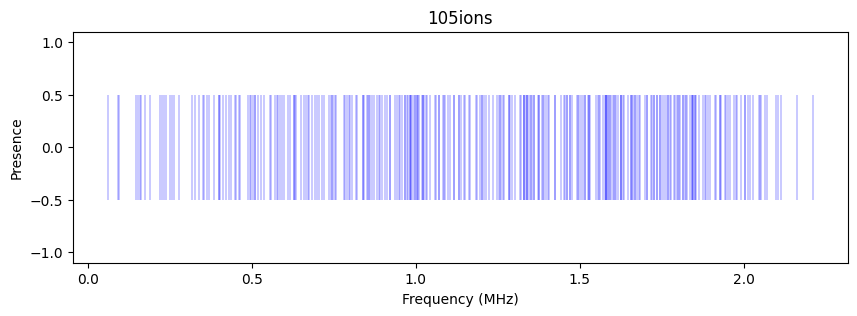

In [30]:
plt.figure(figsize=(10, 3))
plt.eventplot(frequencies, lineoffsets=0, linelengths=1, orientation='horizontal', colors='blue', linewidths=0.3)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Presence")
plt.title("%dions"%N)
plt.show()

In [ ]:
# 300离子平衡位置
